# 머신러닝 실전 스킬
- 교차 검증 방법
- 데이터 증강 기법
- 앙상블

# 교차 검증 방법

Cross validation

데이터가 부족할 때 자주 사용하는 방법으로 데이터를 여러 개로 나누어 각 학습마다 다른 검증 데이터셋을 사용하는 방법

## K-fold Cross Validation

k = 5

<img src="https://i.imgur.com/4q8OiKQ.png" width="600px">

## 유방암 데이터셋을 이용한 실습

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()

df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 전처리

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df.drop(columns=['target']))

scaled[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

## 데이터셋 분할

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(scaled, df['target'], test_size=0.2, random_state=2020)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(455, 30) (455,)
(114, 30) (114,)


## 학습, 검증

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_val)

accuracy_score(y_val, y_pred)

0.9736842105263158

## 교차 검증을 위한 데이터 분할

In [ ]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)

for i, (train_indices, val_indices) in enumerate(cv.split(scaled)):
  print('i =', i + 1)
  print('train_indices', train_indices)
  print('val_indices', val_indices)

i = 1
train_indices [114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 35

## 교차 검증 (진부한 방법)

In [ ]:
model = LogisticRegression()

cv = KFold(n_splits=5)

accs = []

for train_indices, val_indices in cv.split(scaled):
  x_train = scaled[train_indices]
  y_train = df.loc[train_indices]['target']

  x_val = scaled[val_indices]
  y_val = df.loc[val_indices]['target']

  model.fit(x_train, y_train)

  y_pred = model.predict(x_val)

  accs.append(accuracy_score(y_val, y_pred))

accs

[0.9736842105263158,
 0.956140350877193,
 0.9824561403508771,
 0.9824561403508771,
 0.9911504424778761]

## 교차 검증 (간단한 방법)

In [ ]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression()

cv = KFold(n_splits=5)

accs = cross_val_score(model, scaled, df['target'], cv=cv)

accs

array([0.97368421, 0.95614035, 0.98245614, 0.98245614, 0.99115044])

In [ ]:
from sklearn.svm import SVC

model = SVC()

cv = KFold(n_splits=5)

accs = cross_val_score(model, scaled, df['target'], cv=cv)

accs

array([0.94736842, 0.96491228, 0.97368421, 0.99122807, 0.97345133])

## 생각해 볼 문제

교차 검증을 사용하지 않았을 때의 결과와 비교해서 더 나아졌다고 말할 수 있을까?

# 데이터 증강 기법

Data augmentation

과대적합을 해결하고 정확도를 높이기 위해 데이터의 양을 증가시키는 방법

<img src="https://i.imgur.com/GMIipMV.png" width="600px">

## MNIST 데이터셋을 이용한 실습

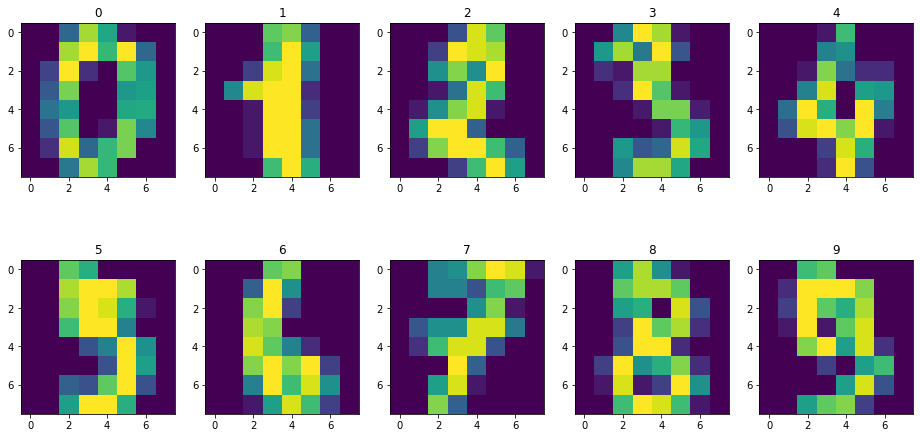

In [ ]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

digits = load_digits()

data = digits['data']
target = digits['target']

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
  ax.imshow(scaled[i].reshape((8, 8)))
  ax.set_title(target[i])

## 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(scaled, target, test_size=0.2, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1437, 64) (1437,)
(360, 64) (360,)


## 학습, 검증

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_val)

accuracy_score(y_val, y_pred) * 100

97.77777777777777

## imgaug 패키지

Image augmentation 을 쉽게 적용할 수 있도록 하는 도와주는 패키지

https://github.com/aleju/imgaug

<img src="https://i.imgur.com/vVkSKya.png" width="600px">

## 증강 전 데이터 출력

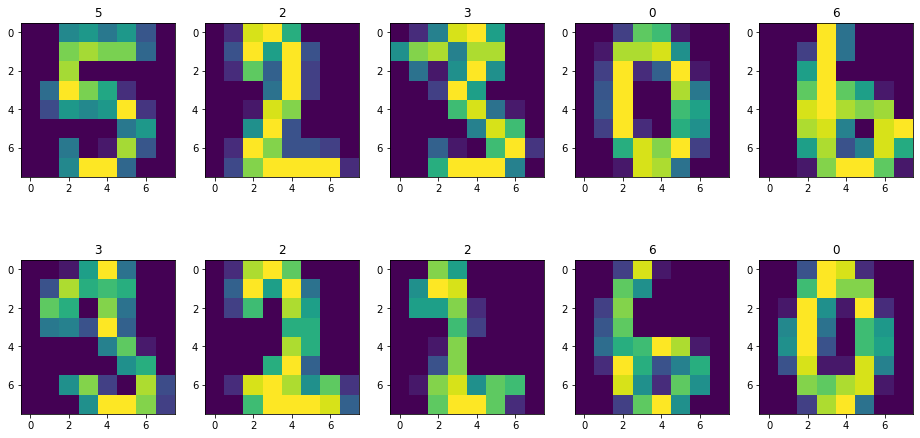

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
  ax.imshow(x_train[i].reshape((8, 8)))
  ax.set_title(y_train[i])

## 증강 후 데이터 출력

imgaug의 Sequential은 이미지를 입력으로 받는다 (reshape 필요)

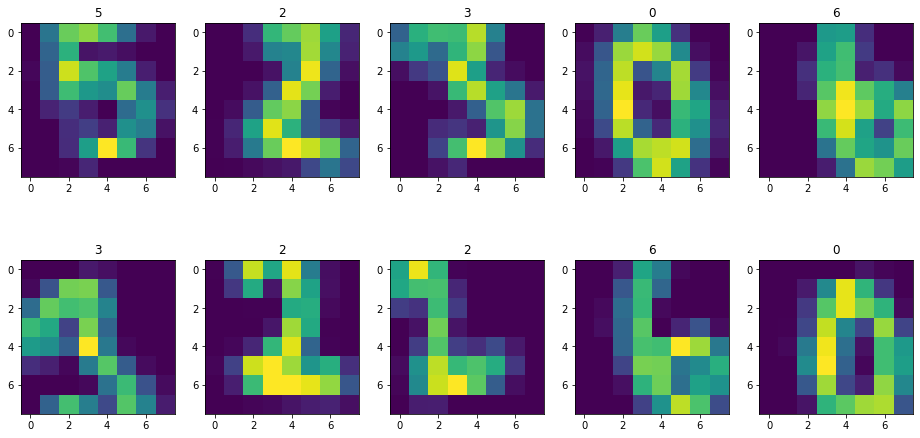

In [ ]:
import imgaug.augmenters as iaa

seq = iaa.Sequential([
  iaa.Affine(
    translate_px={'x': (-1, 1), 'y': (-1, 1)},
    rotate=(-15, 15)
  ),
  iaa.GaussianBlur(sigma=(0, 0.5))
])

x_train_aug = seq(images=x_train.reshape((-1, 8, 8)))

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
  ax.imshow(x_train_aug[i])
  ax.set_title(y_train[i])

## 증강 전 데이터와 증강 후 데이터 합치기

In [ ]:
import numpy as np

x_train_merged = np.concatenate([x_train, x_train_aug.reshape((-1, 64))], axis=0)
y_train_merged = np.concatenate([y_train, y_train], axis=0)

print(x_train_merged.shape, y_train_merged.shape)

(2874, 64) (2874,)


## 학습, 검증

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()

model.fit(x_train_merged, y_train_merged)

y_pred = model.predict(x_val)

accuracy_score(y_val, y_pred) * 100

97.77777777777777

## 데이터 증강 +2

정확도가 안좋아졌다구요? 왜 그럴까요?

한 번 더 증강하면 좋아질까요?

In [ ]:
seq = iaa.Sequential([
  iaa.Affine(
    translate_px={'x': (-1, 1), 'y': (-1, 1)},
    rotate=(-15, 15)
  ),
  iaa.GaussianBlur(sigma=(0, 0.5))
])

x_train_aug = seq(images=x_train.reshape((-1, 8, 8)))

x_train_merged = np.concatenate([x_train_merged, x_train_aug.reshape((-1, 64))], axis=0)
y_train_merged = np.concatenate([y_train_merged, y_train], axis=0)

print(x_train_merged.shape, y_train_merged.shape)

(11496, 64) (11496,)


## 학습, 검증

In [ ]:
model = SVC()

model.fit(x_train_merged, y_train_merged)

y_pred = model.predict(x_val)

accuracy_score(y_val, y_pred) * 100

98.05555555555556

# 앙상블

여러 개의 모델을 이용해 최적의 답을 찾아내는 기법

- 최소 2% 이상의 성능 향상 효과를 볼 수 있다
- 적절한 Hyperparameter 튜닝이 필수
- (여러 개의 모델을 사용하니까) 일반적으로 학습 시간이 오래 걸린다

<img src="https://i.imgur.com/OAa0qC0.png" width="600px">

<img src="https://i.imgur.com/t9SRViu.png" width="600px">

## Voting

### 보스턴 집 값 데이터셋을 사용한 실습

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

data = load_boston()

df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 데이터셋 분할

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(404, 13) (404,)
(102, 13) (102,)


### 파이프라인

Pipeline

데이터 전처리 과정와 모델의 학습 과정을 합쳐 하나의 파이프라인으로 만들 수 있습니다.

1. 표준화
2. 학습

<img src="https://i.imgur.com/4bgc0wg.jpg" width="400px">

#### 선형 회귀 파이프라인 예제

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

lr = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_val)

lr_mae = mean_absolute_error(y_val, lr_y_pred)
lr_mae

3.51904829503486

### Ridge Regression

https://scikit-learn.org/stable/modules/linear_model.html

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(x_train, y_train)
ridge_y_pred = ridge.predict(x_val)

ridge_mae = mean_absolute_error(y_val, ridge_y_pred)
ridge_mae

3.493837022979013

### Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso = make_pipeline(
    StandardScaler(),
    Lasso()
)

lasso.fit(x_train, y_train)
lasso_y_pred = lasso.predict(x_val)

lasso_mae = mean_absolute_error(y_val, lasso_y_pred)
lasso_mae

3.529737163981897

### Elastic-Net

In [ ]:
from sklearn.linear_model import ElasticNet

en = make_pipeline(
    StandardScaler(),
    ElasticNet()
)

en.fit(x_train, y_train)
en_y_pred = en.predict(x_val)

en_mae = mean_absolute_error(y_val, en_y_pred)
en_mae

3.400071876292752

### Voting

투표를 통해 결정하는 방법. 회귀 모델에서는 각 모델 예측값의 평균을 낸다

In [ ]:
(lr_y_pred + ridge_y_pred + lasso_y_pred + en_y_pred) / 4

array([21.8260859 , 17.15531487, 21.77178638, 13.8722192 , 35.30438887,
       19.53686474, 26.27372769, 28.04196192, 23.09001609, 31.44970112,
       37.68571805, 26.47747005, 17.80068346, 39.1657829 , 32.02594242,
       24.2775119 , 22.63248986, 11.11671655, 11.33661818, 31.26203403,
       21.96899576, 15.23943431, 14.80095245, 30.1949529 , 14.90333856,
       18.67970868, 20.97040977, 26.08593751, 22.71967613, 16.40790742,
       20.11348823, 29.94457291, 14.55227857, 24.64336332, 29.09323337,
       17.10969814, 26.49641442, 18.20950487, 32.65935663, 25.0260597 ,
       20.1502277 , 27.56575248, 30.8843251 , 30.54262092, 10.6007494 ,
       27.46494962, 21.75927995, 27.06944612, 23.93355402, 28.44328025,
       16.51970044, 38.33514597, 21.69551671, 30.10155991, 19.8858737 ,
       22.40162788, 24.45391319, 23.91252064, 31.43861445, 22.79023925,
       34.14549623, 21.01296956, 14.33268791, 24.61728321, 25.50029145,
       21.46419629, 22.53860455, 26.18957659, 21.4768434 ,  4.77

### Voting MAE

In [ ]:
mean_absolute_error(y_val, (lr_y_pred + ridge_y_pred + lasso_y_pred + en_y_pred) / 4)

3.3338227894829955

### Voting (간단한 방법)

In [ ]:
from sklearn.ensemble import VotingRegressor

models = [
    ('lr', lr),
    ('ridge', ridge),
    ('lasso', lasso),
    ('en', en)
]

vr = VotingRegressor(models)

vr.fit(x_train, y_train)

y_pred = vr.predict(x_val)

mean_absolute_error(y_val, y_pred)

3.3338227894829955

### MNIST 데이터셋을 사용한 실습

In [ ]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

digits = load_digits()

data = digits['data']
target = digits['target']

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

x_train, x_val, y_train, y_val = train_test_split(scaled, target, test_size=0.2, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1437, 64) (1437,)
(360, 64) (360,)


### Voting (Hard)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models = [
    ('svc', SVC()), 
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier())
]

vc = VotingClassifier(models, voting='hard')

vc.fit(x_train, y_train)

y_pred = vc.predict(x_val)

accuracy_score(y_val, y_pred) * 100

98.05555555555556

### 분류 문제에서의 Voting 방법

#### Hard Voting

<img src="https://i.imgur.com/SSu5KI3.png" width="600px">

#### Soft Voting

<img src="https://i.imgur.com/kjlAUNr.png" width="600px">

### Voting (Soft)

In [ ]:
models = [
    ('svc', SVC(probability=True)), 
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier())
]

vc = VotingClassifier(models, voting='soft')

vc.fit(x_train, y_train)

y_pred = vc.predict(x_val)

accuracy_score(y_val, y_pred) * 100

97.77777777777777

## Bagging

Bootstrap AGGregatING

- Voting은 여러 알고리즘을 조합하여 사용
- Bagging은 한 알고리즘을 데이터를 분할하여 사용

<img src="https://i.imgur.com/Pfxj2VX.png" width="600px">

### Random Forest

- Decision Tree 기반 가장 유명한 Bagging 앙상블 모델
- (대충써도) 성능이 좋다

<img src="https://i.imgur.com/uUslpwi.png" width="600px">

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=80)

model.fit(x_train, y_train)

y_pred = model.predict(x_val)

accuracy_score(y_pred, y_val) * 100

96.94444444444444

## 앙상블 더 알아보기

- Boosting https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-3